# 04: Effective Medium (EM) theory 2: Contact models 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams['font.size']=14
plt.rcParams['font.family']='arial'


<div class="alert alert-block alert-success">
<b>Learning Objectives:</b>
<ul>
    <li>Hertz-Mindlin approach </li>
    <li>Reduced shear factor</li>
    <li>Walton's model</li>
    <li>Assumptions and limitations of each model</li>
</ul>
</div>

## Hertz-Mindlin approach

Hertz estimated the effective bulk modulus of a *dry, random distributed, identical-sphere pack* as:

$
K_{eff}= \left [ \frac{C^2(1-\phi)^2 G^2}{18\pi^2 (1-\nu ^2)}P   \right ]^{1/3} 
$

Mindlin (1949) showed that if the spheres are first pressed together, and a tangential
force is applied afterward, slip may occur at the edges of the contact. The normal stiffness is the same as in the Hertz solution, while the effective shear modulus of a *dry, random distributed, identical-sphere pack* given by Mindlin is: 

$
G_{eff}=\frac{5-4\nu }{5(2-\nu )} \left [ \frac{3C^2(1-\phi)^2 G^2}{2\pi^2 (1-\nu ^2)}P   \right ]^{1/3}
$

$C$ is the coordination number being the average number of contacts per particle. $P$ is the hydrostatic confining pressure, $G$ and $\nu$ are the shear modulus and Poisson' ratio of grain material, respectively. 

## Reduced shear factor
There are experimental data show that bulk modulus of unconsolidated sand can be well predicted using Hertz Mindlin model, but the predicted shear modulus don't match the lab data. Walton's model is limited to no-slip and slip grain packs, in order to account for the fact that the friction between grains may in the state between no-slip and slip limits, Duffaut et al.(2010) are given as an average of the no-slip and slip contacts. A methodology that gives the same result is the binary mixing factor described in Bachrach and Avseth (2008). The factor from Bachrach and Avseth (2008) treats the grain assembly as a mixture of no-slip and slip contacts, instead of having all contacts at an intermediary state. As a result, the
effective bulk modulus of the pack remains the same, but the expression for the
effective shear modulus becomes 

$
G_{\mathrm{eff}}=\frac{2+3 f-v(1+3 f)}{5(2-v)}\left[\frac{3 C^{2}(1-\phi)^{2} \mu^{2}}{2 \pi^{2}(1-v)^{2}} P\right]^{1 / 3}
$

In [2]:
def hertzmindlin(K0, G0, phic, Cn, sigma, f):
    """Compute effective elastic moduli of granular packing via Hertz-Mindlin approach. Written by Jiaxin Yu (July 2021)
    Args:
        K0 (GPa): bulk modulus of grain material
        G0 (GPa): shear modulus of grain material
        phic (GPa): critical porosity
        Cn (unitless): coordination number
        sigma (MPa): effective stress
        f (unitless): reduced shear factor, 0=dry pack with inifinitely rough spheres; 1=dry pack with infinitely smooth spheres

    Returns:
        K_dry, G_dry: effective elastic moduli of dry pack
    
    """    
    sigma =sigma/1000 # converts pressure unit to GPa
    nu=(3*K0-2*G0)/(6*K0+2*G0) # poisson's ratio of mineral mixture
    K_dry = (sigma*(Cn**2*(1-phic)**2*G0**2) / (18*np.pi**2*(1-nu)**2))**(1/3)
    G_dry = ((2+3*f-nu*(1+3*f))/(5*(2-nu))) * ((sigma*(3*Cn**2*(1-phic)**2*G0**2)/(2*np.pi**2*(1-nu)**2)))**(1/3)
    return K_dry, G_dry

## Walton's model
Mindlin assumes a partial slip in the contact area. In constrast, Walton assumes that normal and shear deformation of a two-grain combination occur simultaneously.  The slip occurs across the whole area once applied tractions exceed the friction resistance. Spheres maybe infinitely smooth (perfect slip) or infinitely rough (no slip). For the smooth-spheres dry pack: 

$
G_{nofriction}=\frac{1}{10}  \left [ \frac{12C^2(1-\phi)^2 G^2}{\pi^2 (1-\nu ^2)}P   \right ]^{1/3}
$

$
K_{nofriction}=\frac{5}{3}G_{nofriction}
$

The rough limit is the same as Hertz-Mindlin' theory. 


In [3]:
def Walton(K0, G0, phic, Cn, sigma, f):
    """ Compute dry rock elastic moduli within the mechanical compaction
    domain based on the Contact Theory (CT) of Walton (1987). Written by Jiaxin Yu (July 2021)

    Args:
        K0 (GPa): Bulk modulus of grain material
        G0 (GPa): shear modulus of grain material
        phic (frac): depositional porosity, Defaults to 0.4.
        Cn (unitless): coordination number Defaults to 8.6.
        sigma (MPa): effective stress. Defaults to 10.
        f (unitless): reduced shear factor. 0=dry pack with inifinitely rough spheres; 1=dry pack with infinitely smooth spheres
    """   
    sigma= sigma/1e3 # convert Mpa to Gpa 
    lamda = K0- 2*G0/3  # Lamé’s coefficient of the grain material.  
    B = 1/(4*np.pi) *(1/G0+1/(G0+lamda))
    #A = 1/(4*np.pi) *(1/G0-1/(G0+lamda))

    K_w= 1/6 * (3*(1-phic)**2*Cn**2*sigma/(np.pi**4*B**2))**(1/3)
    G_dry1= 3/5 * K_w
    nu =(3*K0-2*G0)/(6*K0+2*G0)  # possion's ratio
    G_dry2= 3/5 * K_w *(5-4*nu)/(2-nu) # rought limit is the same as Hertz-Mindlin
    G_w= f* G_dry2+(1-f)*G_dry1
    return K_w, G_w

Noticed that the function `hertzmindlin` and `walton` yield exactly the same result as we include the reduced shear factor in both functions. But remember the difference between Hertz-Mindlin's approach and Walton' appraoch and their relations, as above decribed.

In [4]:
print('HM result:', hertzmindlin(30,20,0.4,6,10,0.5))
print('Walton result:',Walton(30,20,0.4,6,10,0.5))

HM result: (0.7876744416165334, 0.7816154074502524)
Walton result: (0.7876744416165333, 0.7816154074502523)


## Examples
* The effect of reduced shear factor on HM modelling

In [5]:
# specify model parameters
phic=0.4
Cn=8.6
sigma=np.linspace(0,20,100) # confining pressure 
K0, G0= 37,44
Kw, Gw= 2.2,0
# no slip and slip limit
_,G_rough= hertzmindlin(K0, G0, phic, Cn, sigma, 0)
_,G_smooth= hertzmindlin(K0, G0, phic, Cn, sigma, 1)

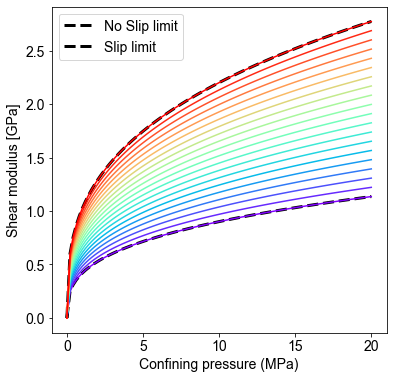

In [23]:
# plot
plt.figure(figsize=(6,6))
plt.xlabel('Confining pressure (MPa)')
plt.ylabel('Shear modulus [GPa]')
plt.plot(sigma, G_rough,'--k',lw=3,label='No Slip limit')
plt.plot(sigma, G_smooth,'--k',lw=3,label='Slip limit')
# HM modelling for a discrete set values of reduced shear factors
len=20
f= np.linspace(0,1,len)
colors = plt.cm.rainbow(np.linspace(0, 1, len))
for i, val in enumerate(f):
    _,G= hertzmindlin(K0, G0, phic, Cn, sigma, val)
    plt.plot(sigma, G, color=colors[i])
plt.legend(loc='best')


<div class="alert alert-block alert-warning">
<b>Assumptions and limitations:</b> 
<ul>
    <li>The grainular assembly is in an isotropic or uniaxial strain state. Wave induced stresses and strain are small, meaning the porosity is "locked" to about 36 %. </li>
    <li>Grains are homogeneous, isotropic, elastic spheres. Packings are assumed to be random and
statistically isotropic</li>
    <li>All contacts contribute equally to the calculated stiffnesses.– The incremental stiffnesses are computed by summation over all contacts between spheres </li>
    <li>No new contacts are generated by loading, and no contacts are lost during unloading. </li>
</ul>
<b>Extensions:</b> 
<ul>
    <li>To calculate the effective elastic moduli of saturated rocks (and their low-frequency acoustic velocities), Gassmann’s formula should be applied.</li>
    <li>For mixed minerology, VRH average can be used to compute an average elastic moduli of grain material as input to HM modelling</li>
</ul>
</div>

Notice that in many experiments on natural sands and artificial granular
packs, the observed dependence of the elastic moduli on pressure is different
from that given by the Hertz–Mindlin theory. This is because the grains are
not perfect spheres, and the contacts have configurations different from
those between perfectly spherical particles. Hertz–Mindlin theory also fails to
incorporate the spatial heterogeneity of stress and strain within the random
grain pack

<div class="alert alert-block alert-info">
<b>Reference:</b> Mavko, G., Mukerji, T. and Dvorkin, J., 2020. The rock physics handbook. Cambridge university press.
</div>